# **Scikit-learn - Topic 1: ML Pipeline and ML tasks**

## Objectives

* Learn and use the workflow for training and evaluating the ML pipeline.
* Create a pipeline according to our dataset and ML task.
* Fit Regression, Classification, Cluster, PCA (Principal Component Analysis), and NLP (Natural Language Processing) considering different algorithms.
* Learn and use the code to fit in one turn, multiple algorithms with hyperparameters optimisation.
* Learn and use the workflow for training and evaluating the ML pipeline.




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\ML_practice\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\ML_practice'

# Pipeline concept

* In ML, we are interested in arranging a sequence of tasks that are in line with the ML process of data cleaning, feature engineering, feature scaling, feature selection and model.
* In an ML pipeline, the last step is typically the model, and the preceding steps prepare the data for the model.

In addition, the pipeline should identify two outcomes; the training outcome and the prediction outcome.

* For that, we use estimators as part of the pipeline steps. Two types of estimators are mainly used: predictors and transformers.
* A predictor estimator uses methods like .fit() and .predict().
* An ML model uses these methods to learn patterns from the data and is used for subsequent predictions.
* On the other hand, the transformer estimator uses the methods .fit() and .transform() because it learns from the data and later transforms it with a better distribution.

This notebook will demonstrate the differences between fitting models with and without a pipeline.

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
from sklearn.pipeline import Pipeline

### Feature Scaling and Feature Selection

#### Feature Scaling

The scale of a feature is an important aspect when fitting a model. For example, algorithms like K-means clustering, linear and logistic Regression, and Neural Networks are highly affected by the scale of their features.

According to Scikit-learn [documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), feature scaling can be an important preprocessing step for many machine-learning algorithms. Standardisation involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

* The idea behind scaling the features is to make all features have a similar scale.

We will present StandardScaler(), which standardises the data: it centres the variable at zero. It sets the variance to 1, by subtracting the mean from each observation and dividing by the standard deviation. It is also known as the Z-score. 
* The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 
* Alternatives methods to feature scaling can be found [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

The tradeoff of feature scaling is that the variable distribution will be slightly different. Still, we will create better conditions for the algorithm to learn the patterns and relationships in the data and generalize on unseen data.

In [6]:
#load iris dataset from seaborn
df =  sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#import standard scaler from seaborn
from sklearn.preprocessing import StandardScaler

In [8]:
#create a pipeline with a feature scaling step
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
      ("feature_scaling", StandardScaler()) 
  ])

We will apply this pipeline to the features in the train set.

* In this dataset, features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] and target is ['species']. We shuffle the data and will get the first 100 rows and set them as the train set. The remaining goes to the test.
* The central point is to have 2 sets (Train and Test) and have features and the target separated.

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

In [9]:
#shuffle the data
df = df.sample(frac=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
81,5.5,2.4,3.7,1.0,versicolor
95,5.7,3.0,4.2,1.2,versicolor
104,6.5,3.0,5.8,2.2,virginica
36,5.5,3.5,1.3,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa


* The train set features are X_train and have the first 100 rows. The train set target is y_train and has the last 50 rows from species. 
* The same rationale goes for the test set, x_test has the first 100 rows and y_test the last 50 rows.

In [11]:
#split dat into train and test sets with X containing features and y the target
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:100]
y_train =  df[['species']][:100]
X_test =  df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][100:]
y_test =  df[['species']][100:]
#Check the dimensions of the DataFrames
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 4) (100, 1) (50, 4) (50, 1)


When applying pipelines to ML, we fit the pipeline to the train set (so it will learn the parameters) and, based on this learning, transform the data on the train and test set.

In [ ]:
#fit pipeline to train set - use pipeline to transform train & test sets
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)

X_train_scaled and X_test_scaled are numpy arrays so need to be converted into DataFrames.

In [13]:
#convert numpy arrays to DataFrames
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_train.columns)

In [15]:
print(type(X_train_scaled), type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


We are now interested to see the difference in each feature before and after applying StandardScaler().

* We create a logic to loop on each feature and plot two histograms in the same plot. One shows the data distribution before applying StandardScaler() and the other after applying it.
* The blue plot is before applying, and the red is after. Note that the red histograms are centred at zero on the x-axis. You will notice the distribution may change a bit, but that is part of the tradeoff we mentioned earlier.

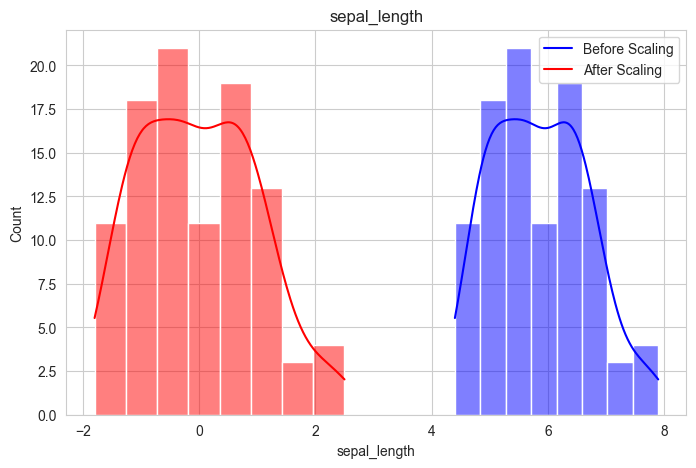

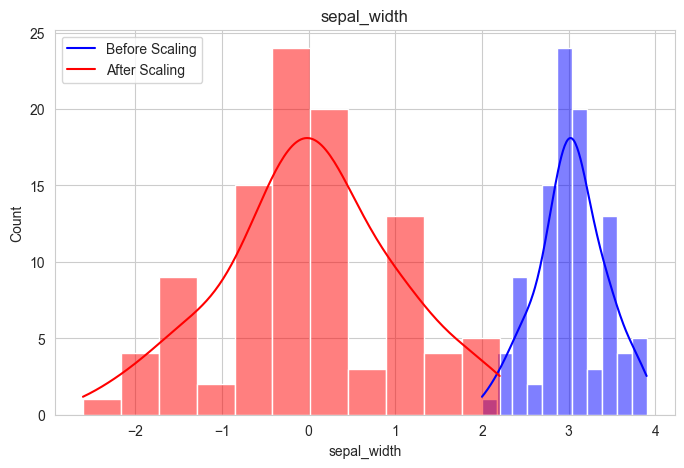

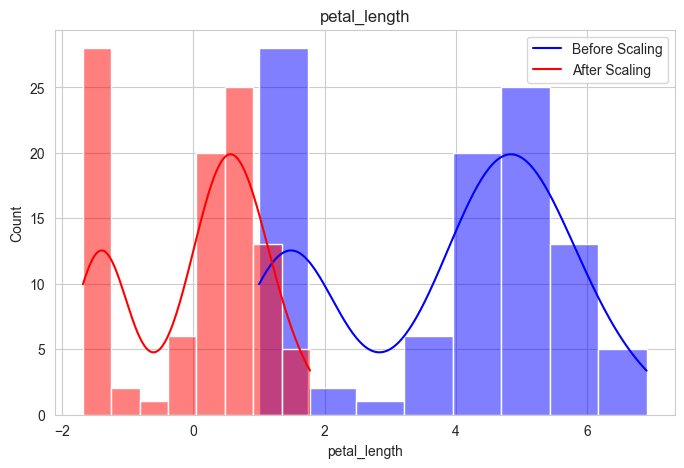

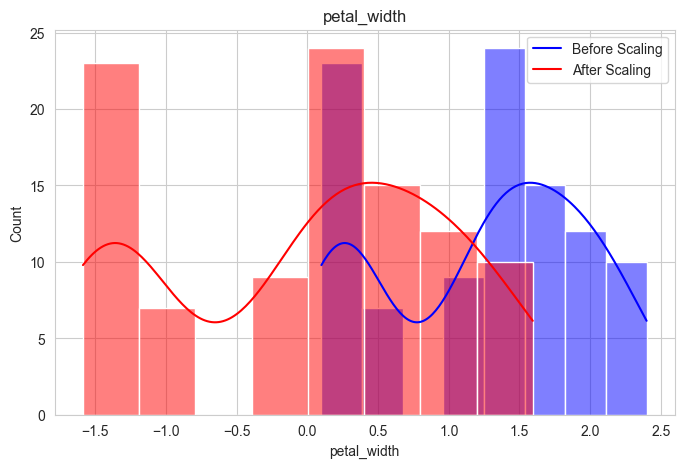

In [16]:
#Distribution of features before and after scaling
sns.set_style('whitegrid')
for col in X_train.columns:
  fig, axes = plt.subplots(figsize=(8,5))
  sns.histplot(data=X_train, x=col, kde=True, color='b',  ax=axes)
  sns.histplot(data=X_train_scaled, x=col, kde=True,color='r', ax=axes)
  axes.set_title(f"{col}")
  axes.legend(labels=['Before Scaling', 'After Scaling'])
  plt.show()
  print("\n\n")

### Feature Selection

The primary goal of feature selection is to have a process to select the relevant features for fitting an ML model.

That is important since:

* Models with fewer and more relevant features are simpler to interpret.
* You reduce the chance of overfitting by removing features that may add little information or noise.
* You reduce the time needed to train the models.
* You reduce the feature space. You require less effort from the software development team to design  and implement the interface (either API or dashboard) in the production environment.

This step can be seen as a combination of search techniques to look for a subset of features and an evaluation measure that scores the different feature subsets. There are a few methods for feature selection:

* Filter Method
* Wrapper Method
* Embedded Method

We will use the embedded method here:

* It is named the embedded method since it performs feature selection during the model training. It finds the feature subset for the algorithm that is being trained.
* The method automatically trains an ML model and then derives feature importance from it, removing non-relevant features using the derived feature importance.
* We are using SelectFromModel() as the method. Its documentation is found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html).


In [17]:
#Examine the dataset already created
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train.head()

(100, 4) (100, 1) (50, 4) (50, 1)


,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
95,5.7,3.0,4.2,1.2
104,6.5,3.0,5.8,2.2
36,5.5,3.5,1.3,0.2
24,4.8,3.4,1.9,0.2


We create a pipeline using a Decision Tree algorithm that contains three steps:

* feature_scaling
* feature_selection: use SelectFromModel considering the same algorithm from the model step.
* model: uses a Decision Tree algorithm (we will get into more details in upcoming units), for now, take this step as the model step and let's use a decision tree for the example.

In [18]:
#import model and classifier library
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
#create pipeline
pipeline = Pipeline([
      ( "feature_scaling", StandardScaler() ),
      ( "feature_selection", SelectFromModel(DecisionTreeClassifier(random_state=101)) ),
      ( "model", DecisionTreeClassifier(random_state=101) ),
  ])

pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [19]:
#fit pipeline to Train set
pipeline.fit(X_train,y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

 We can use .get_support() to access which features were selected by this step.

* The output is a boolean list, where its length and order are related to the original feature space.
* For example, the train set has four features. We see that the feature_selection step selected the last two steps since they are True. 
* The first two features were not considered since they are False in the boolean list.

In [20]:
#access feature_selection set and show variable list
pipeline['feature_selection'].get_support()

array([False, False,  True,  True])

Using this boolean list we can subset the relevant features.

* And here we have the features that were considered important for that given dataset using that given algorithm.

In [21]:
#Use feature selction to filter relevant features
X_train.columns[pipeline['feature_selection'].get_support()] 

Index(['petal_length', 'petal_width'], dtype='object')

### ML tasks

We can now explore business cases that involve the following ML tasks:

* Regression
* Classification (Binary and Multi-class)
* Clustering
* NLP (Natural Language Processing)

 Structured and tabular datasets are available ML libraries like Seaborn, Plotly, Scikit-learn and Yellow-brick.

#### General Workflow

IWe can use CRISP-DM workflow to manage project steps. 

We will focus on the following CRISP-DM steps: 
* data understanding
* data preparation
* modelling 
* evaluation.

Therefore, when you reach the modelling phase in a project, it is assumed you have collected the data, conducted an EDA, and defined the pipeline steps.

When modelling, for supervised learning, the typical overall workflow is:
* Split the dataset into train and test set
* Fit the model (either a pipeline or not)
* Evaluate your model. If performance is not good, revisit the process, starting from collecting the data, conducting EDA etc

There are some potential small variations to this workflow, but we will use as a starting point.